In [1]:
from dataclasses import dataclass
from enum import StrEnum
from datetime import datetime, timedelta
import polars as pl
from common.constants.column_types import (
    CPZP_SCHEMA,
    OZP_SCHEMA,
    POHLAVI_CPZP,
    TYP_UDALOSTI,
)
from common.constants.column_names import SHARED_COLUMNS, OZP_COLUMNS, CPZP_COLUMNS
import pickle
from common.constants.objects import (
    Person,
    Gender,
    AgeCohort,
    Prescription,
    PrescriptionType,
)
from common.utils import draw_chart

pl.Config.set_tbl_rows(20)
pl.Config.set_tbl_cols(60)


with open("./DATACON_data/cpzp_persons.pkl", "rb") as f:
    cpzp_persons: list[Person] = pickle.load(f)

with open("./DATACON_data/ozp_persons.pkl", "rb") as f:
    ozp_persons: list[Person] = pickle.load(f)

In [3]:
alive_cpzp_persons = [p for p in cpzp_persons if p.died_at is None]
print(len(alive_cpzp_persons))

1466955


In [9]:
vax_sum = 0
for person in alive_cpzp_persons:
    if person.vaccines:
        if (
            datetime(2021, 5, 19).date() - timedelta(days=30)
            <= person.vaccines[0].date
            <= datetime(2021, 5, 19).date() + timedelta(days=30)
        ):
            for prescription in person.prescriptions:
                if (
                    prescription.age_cohort_at_prescription
                    == AgeCohort.BETWEEN_30_AND_50
                ):
                    if (
                        datetime(2021, 5, 19).date() - timedelta(days=60)
                        <= prescription.date
                        <= datetime(2021, 5, 19).date() + timedelta(days=60)
                    ):
                        if prescription.prednison_equiv is not None:
                            vax_sum += prescription.prednison_equiv

print(vax_sum)

17907.75


7129
defaultdict(<class 'int'>, {datetime.date(2021, 4, 21): 113, datetime.date(2021, 3, 29): 97, datetime.date(2021, 6, 21): 84, datetime.date(2021, 5, 11): 74, datetime.date(2021, 4, 15): 116, datetime.date(2021, 3, 25): 67, datetime.date(2021, 4, 30): 76, datetime.date(2021, 3, 23): 91, datetime.date(2021, 4, 20): 88, datetime.date(2021, 4, 12): 89, datetime.date(2021, 5, 8): 7, datetime.date(2021, 5, 10): 85, datetime.date(2021, 5, 28): 56, datetime.date(2021, 6, 4): 71, datetime.date(2021, 6, 25): 82, datetime.date(2021, 5, 27): 81, datetime.date(2021, 4, 6): 87, datetime.date(2021, 7, 15): 96, datetime.date(2021, 5, 13): 91, datetime.date(2021, 6, 28): 85, datetime.date(2021, 4, 13): 94, datetime.date(2021, 5, 20): 86, datetime.date(2021, 7, 14): 92, datetime.date(2021, 4, 19): 79, datetime.date(2021, 7, 12): 91, datetime.date(2021, 5, 24): 92, datetime.date(2021, 5, 31): 65, datetime.date(2021, 6, 15): 83, datetime.date(2021, 5, 17): 97, datetime.date(2021, 5, 25): 84, datetime.

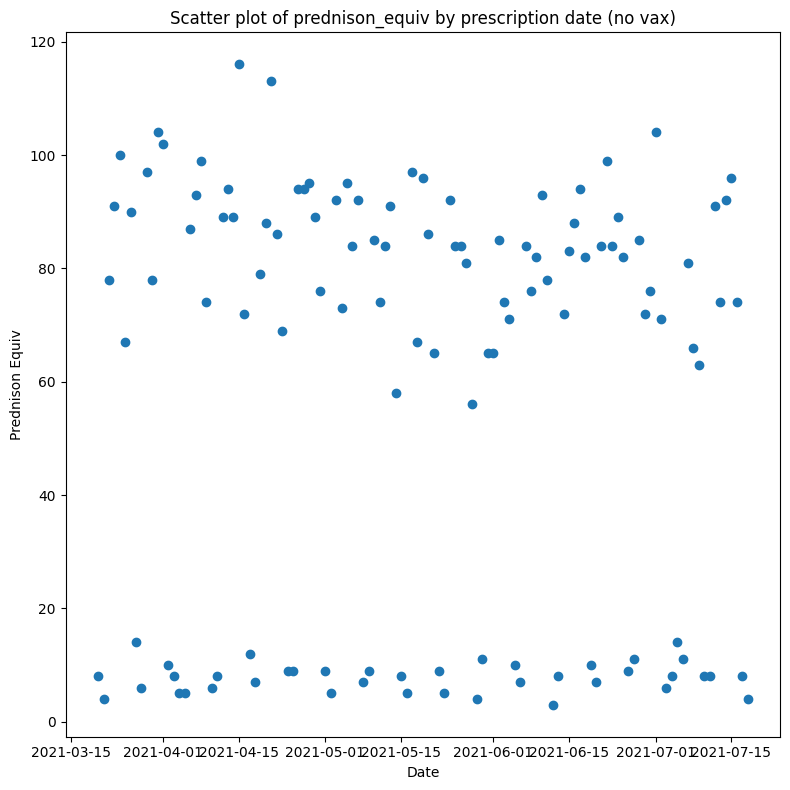

In [ ]:
from collections import defaultdict

vax_sum = 0
mapp = defaultdict(int)
for person in cpzp_persons:
    if person.died_at is not None:
        continue

    if person.vaccines:
        continue

    if not person.prescriptions:
        continue

    last_prescription_date: datetime = datetime.min.date()
    for prescription in person.prescriptions:
        if (
            prescription.lekova_forma == "Injekční suspenze"
            or prescription.lekova_forma == "Injekční/infuzní roztok"
        ):
            if abs((last_prescription_date - prescription.date).days) < 14:
                continue
            last_prescription_date = prescription.date
        if prescription.age_cohort_at_prescription == AgeCohort.BETWEEN_30_AND_50:
            if (
                datetime(2021, 5, 19).date() - timedelta(days=60)
                <= prescription.date
                <= datetime(2021, 5, 19).date() + timedelta(days=60)
            ):
                vax_sum += 1
                mapp[prescription.date] += 1

print(vax_sum)

In [16]:
no_of_corts = 0
no_of_corts_in_2020_2023 = 0
for person in alive_cpzp_persons:
    for prescription in person.prescriptions:
        if prescription.age_cohort_at_prescription == AgeCohort.BETWEEN_30_AND_50:
            if prescription.prescription_type == PrescriptionType.KORTIKOID:
                no_of_corts += 1
                if (
                    prescription.date >= datetime(2020, 1, 1).date()
                    and prescription.date <= datetime(2023, 1, 1).date()
                ):
                    no_of_corts_in_2020_2023 += 1

print(no_of_corts)
print(no_of_corts_in_2020_2023)

558589
189454


In [9]:
no_of_vax_persons = 0

for person in ozp_persons:
    # if not person.age_cohort == AgeCohort.BETWEEN_30_AND_50:
    # continue
    if person.vaccines:
        no_of_vax_persons += 1

print(len(ozp_persons))
print(no_of_vax_persons)

977485
502908


In [15]:
no_of_first_prescriptions = 0

for person in alive_cpzp_persons:
    if not person.prescriptions:
        continue
    first_prescription = person.prescriptions[0]
    if (
        first_prescription.date >= datetime(2020, 1, 1).date()
        and first_prescription.date <= datetime(2023, 1, 1).date()
    ):
        no_of_first_prescriptions += 1

print(no_of_first_prescriptions)

119738


In [ ]:
obj = {
    "num_of_alive_vaxed_persons": 0,
    "num_of_alive_unvaxed_persons": 0,
    "num_of_dead_vaxed_persons": 0,
    "num_of_dead_unvaxed_persons": 0,
}